In [24]:
import matplotlib.pylab as plt
%matplotlib inline

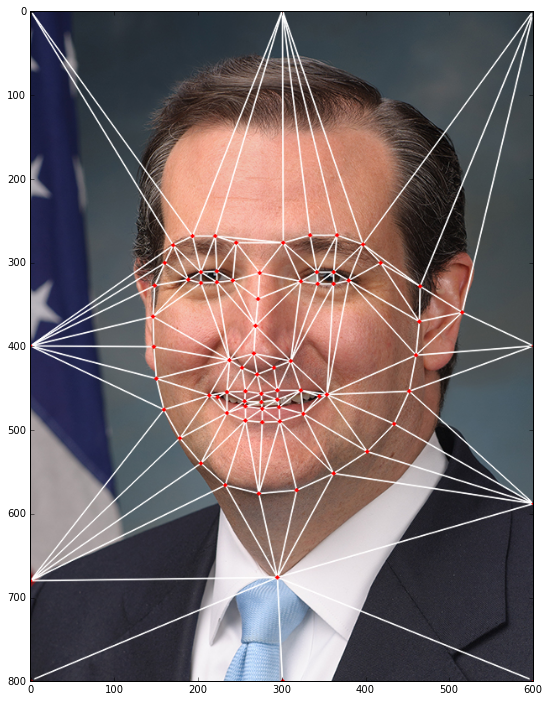

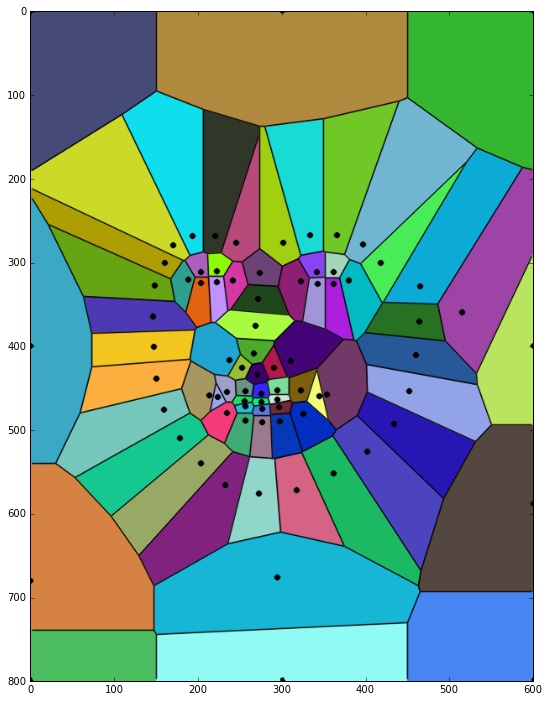

In [26]:
#!/usr/bin/python

import cv2
import numpy as np
import random

# Check if a point is inside a rectangle
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

# Draw a point
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, -1, cv2.LINE_AA, 0 )


# Draw delaunay triangles
def draw_delaunay(img, subdiv, delaunay_color ) :

    triangleList = subdiv.getTriangleList();
    size = img.shape
    r = (0, 0, size[1], size[0])

    for t in triangleList :
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
        
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)


# Draw voronoi diagram
def draw_voronoi(img, subdiv) :

    ( facets, centers) = subdiv.getVoronoiFacetList([])

    for i in xrange(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
        
        ifacet = np.array(ifacet_arr, np.int)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        cv2.fillConvexPoly(img, ifacet, color, cv2.LINE_AA, 0);
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.LINE_AA, 0)
        cv2.circle(img, (centers[i][0], centers[i][1]), 3, (0, 0, 0), -1, cv2.LINE_AA, 0)
        
        cv2.imwrite('/home/zyb/cv/face/triangulation/Voronoi Diagram/'+str(i)+'.jpg',img)



if __name__ == '__main__':

    # Define window names
    win_delaunay = "Delaunay Triangulation"
    win_voronoi = "Voronoi Diagram"

    # Turn on animation while drawing triangles
    animate = True
    
    # Define colors for drawing.
    delaunay_color = (255,255,255)
    points_color = (0, 0, 255)

    # Read in the image.
    img = cv2.imread("./ted_cruz.jpg");
    
    # Keep a copy around
    img_orig = img.copy();
    
    # Rectangle to be used with Subdiv2D
    size = img.shape
    rect = (0, 0, size[1], size[0])
    
    # Create an instance of Subdiv2D
    subdiv = cv2.Subdiv2D(rect);

    # Create an array of points.
    points = [];
    
    # Read in the points from a text file
    #with open("points.txt") as file :
    with open("./ted_cruz.jpg.txt") as file :
        for line in file :
            x, y = line.split()
            points.append((int(x), int(y)))

    # Insert points into subdiv
    count = 0
    for p in points :
        subdiv.insert(p)
        count+=1
        # Show animation
        if animate :
            img_copy = img_orig.copy()
            # Draw delaunay triangles
            draw_delaunay( img_copy, subdiv, (255, 255, 255) );
            cv2.imwrite('/home/zyb/cv/face/triangulation/Delaunay Triangulation/'+str(count)+'.jpg',img_copy)
            plt.imshow(img_copy)
            #cv2.imshow(win_delaunay, img_copy)
            #cv2.waitKey(100)

    # Draw delaunay triangles
    draw_delaunay( img, subdiv, (255, 255, 255) );

    # Draw points
    for p in points :
        draw_point(img, p, (0,0,255))

    # Allocate space for Voronoi Diagram
    img_voronoi = np.zeros(img.shape, dtype = img.dtype)

    # Draw Voronoi diagram
    draw_voronoi(img_voronoi,subdiv)

    # Show results
    plt.rcParams['figure.figsize'] = 16, 12
    plt.imshow(img[:,:,(2,1,0)])
    plt.show()
    plt.rcParams['figure.figsize'] = 16, 12

    plt.imshow(img_voronoi)
    plt.show()
    #cv2.imshow(win_delaunay,img)
    #cv2.imshow(win_voronoi,img_voronoi)
    #cv2.waitKey(0)
